<a href="https://colab.research.google.com/github/ToanToan110/ChurnPrediction/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ***Retention rate/Churn rate*** là chỉ số đo lường mức độ phù hợp của sản phẩm trên thị trường, giúp doanh nghiệp tiếp cận tốt hơn với thị trường.

> Kiểm soát và dự đoán được các chỉ số này sẽ giúp doanh nghiệp chủ động và đảm bảo khách hàng luôn hài lòng với dịch vụ và luôn muốn sử dụng dịch vụ của mình.





In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Driven Growth Series/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



> Giải thích bộ dữ liệu:



1. **customerID**: Id khách hàng
2. **gender**: Giới tính khách hàng
3. **SeniorCitizen**: Có phải người cao tuổi không (Có, Không)
4. **Partner**: Có phải khách hàng đối tác không (Có, Không)
5. **Depenents**: Khách hàng có căn hộ không (Có, Không)
6. **Tenure**: Số tháng khách hàng gắn bó với công ty
7. **PhoneService**: Khách hàng có sử dụng điện thoại không (Có, Không)
8. **MultipleLines**: Khách hàng có nhiều liên lạc không (Có, Không)
9. **InternetService**: Dịch vụ Internet mà KH sử dụng
10. **OnlineSecurity**: KH có bảo mật trực tuyến hay không (Có, Không)
11. **OnlineBackup**: KH có sao lưu trực tuyến hay không (Có, Không)
12. **DeviceProtection**: Thiết bị KH có bảo vệ hay không (Có, Không)
13. **TechSupport**: KH có được hỗ trợ kĩ thuật không (Có, Không)
14. **StreamingTV**: KH có sử dụng truyển hình trực tuyến không (Có, Không)
15. **StreamingMovies**: KH có xem phim trực tuyến không (Có, Không)
16. **Contract**: Thời hạn hợp đồng của khách hàng (Month-to-month, One year, Two year)
17. **PaperlessBilling**: Khách hàng có thanh toán không cần giấy tờ hay không (Có, Không)
18. **PaymentMethod**: Phương thức thanh toán của khách hàng Phương thức thanh toán của khách hàng (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. **MonthlyCharges**: Số tiền khách hàng phải trả hàng tháng
20. **TotalCharges**: Tổng số tiền phải trả cho khách hàng
21. **Churn**: Khách hàng có rời bỏ hay không (Có hoặc Không)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Assuming your DataFrame is named df
# df.replace({'Yes': 1, 'No': 0}, inplace=True)
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# II. Explodatory Analysis:

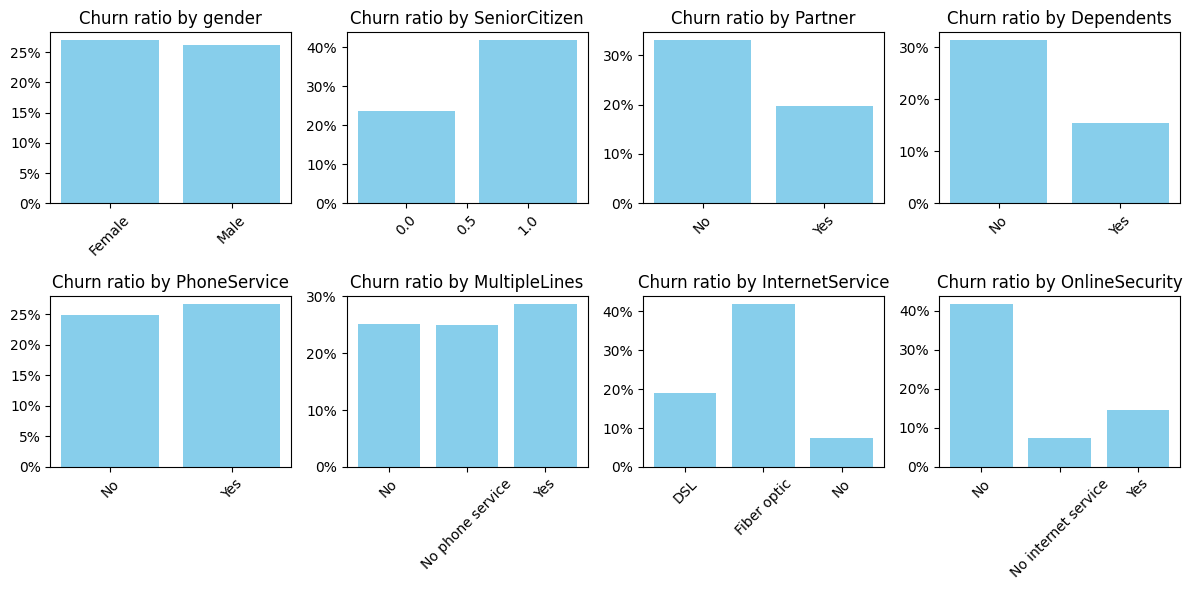

In [ ]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']

# Determine the number of rows and columns for the grid
num_cols = 4
num_plots = len(df.columns) - 1  # Exclude the 'churn' column
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

# Flatten the axes array
axes = axes.flatten()

# Iterate through each column (excluding 'churn')
for i, col in enumerate(columns):
    if col != 'Churn':
        # Group by the current column and calculate the mean of 'churn'
        groupby_col = df.groupby(col)['Churn'].mean().reset_index()

        # Plot a bar chart
        ax = axes[i]
        ax.bar(groupby_col[col], groupby_col['Churn'], color='skyblue')
        # ax.set_xlabel(col)  # Set x-axis label
        # ax.set_ylabel('Mean Churn')  # Set y-axis label
        ax.set_title(f'Churn ratio by {col}')  # Set title
        #  Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Format y-axis tick labels as percentages
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Hide any empty subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Từ biểu đồ trên, ta có thể đưa ra các yếu tố gây ra sự chênh lệch tỷ lệ rời bỏ của khách hàng:**

*   Khách hàng cao tuổi (SeniorCitizen) có khả năng rời đi cao hơn gấp đôi so với phần còn lại, chứng tỏ dịch vụ viễn thông này có vẻ chưa phù hợp với đối tượng người cao tuổi
*   KH không phải đối tác(partner = No) có tỉ lệ rời đi cao hơn ~10%, có thể do khách hàng chưa thực sự tin tưởng vào dịch vụ.
*   KH không có nhà(dependents = No) có tỷ lệ rời đi cao hơn ~10%, dễ hiểu khi vấn đề về kinh tế có thể ảnh hưởng đến nhu cầu sử dụng dịch vụ viễn thông
*  KH sử dụng cáp quang (InternetService = Fiber optic) và KH không có bảo mật online(OnlineSecurity = No) có tỉ lệ rời đi khá cao ~40%, có thể do vấn đề dịch vụ cáp quang, internet của công ty chưa được phù hợp với đa số người dùng.

* Sự khác nhau về giới tính và PhoneService, không ảnh hưởng nhiều đến Churn rate (diff <2%)



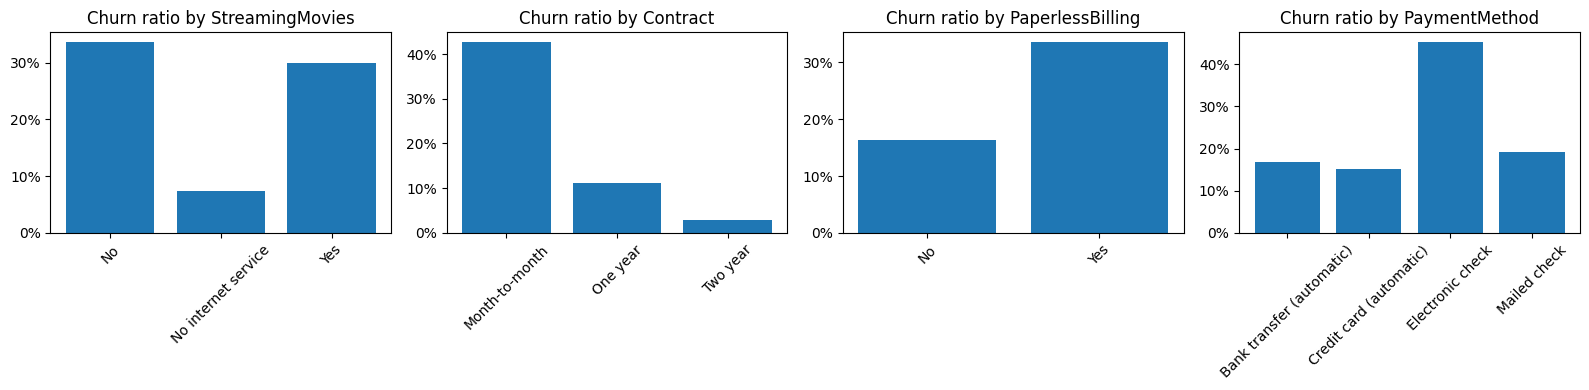

In [ ]:
columns = ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Determine the number of rows and columns for the grid
num_cols = 4
num_plots = len(df.columns) - 1  # Exclude the 'churn' column
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate through each column (excluding 'churn')
for i, col in enumerate(columns):
    if col != 'Churn':
        # Group by the current column and calculate the mean of 'churn'
        groupby_col = df.groupby(col)['Churn'].mean().reset_index()

        # Plot a bar chart
        ax = axes[i]
        ax.bar(groupby_col[col], groupby_col['Churn'])
        # ax.set_xlabel(col)  # Set x-axis label
        # ax.set_ylabel('Mean Churn')  # Set y-axis label
        ax.set_title(f'Churn ratio by {col}')  # Set title
        #  Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Format y-axis tick labels as percentages
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Hide any empty subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Đa số KH hợp đồng tháng (month-to-month) rất dễ rời đi ~40% (do ít sự ràng buộc) chênh lệch khác lớn so với 2 loại hợp đồng còn lại(>30%)
- Tương tự đối với đối tượng sử dụng hình thức thanh toán Séc điện tử (Electronic check)

**Nhận xét chung:**

Đa phần đối tượng KH rời bỏ do các vấn đề khách quan liên quan đến dịch vụ viễn thông.

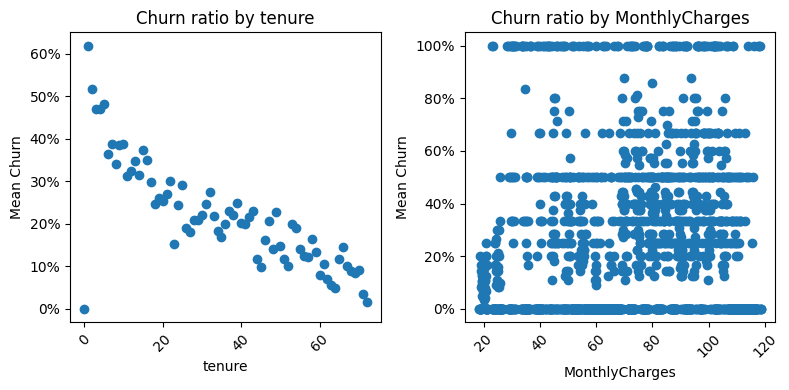

In [ ]:
columns = ['tenure','MonthlyCharges']

# Determine the number of rows and columns for the grid
num_cols = 2
num_plots = len(df.columns) - 1  # Exclude the 'churn' column
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))

# Flatten the axes array
axes = axes.flatten()

# Iterate through each column (excluding 'churn')
for i, col in enumerate(columns):
    if col != 'Churn':
        groupby_col = df.groupby(col)['Churn'].mean().reset_index()

        # Plot a bar chart
        ax = axes[i]
        ax.scatter(groupby_col[col], groupby_col['Churn'])
        ax.set_xlabel(col)  # Set x-axis label
        ax.set_ylabel('Mean Churn')  # Set y-axis label
        ax.set_title(f'Churn ratio by {col}')  # Set title
        ax.tick_params(axis='x', rotation=45)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

- Nhiệm kỳ càng lâu, chứng tỏ đã có lòng tin với dịch vụ cho nên dễ hiểu khi đối tượng này có tỉ lệ Churn thấp
- Tiền chi trả **(MonthlyCharge)** cho dịch vụ nhiều hay ít không ảnh hương đến tỉ lệ rời bỏ dịch vụ

# II. Preprocess

In [ ]:
df_data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns
for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column])
        else:
            dummy_columns.append(column)
#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns, prefix_sep = "__")
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
numerical_df = df_data[numerical_features]
numerical_df = scaler.fit_transform(numerical_df)
numerical_df

array([[0.01388889, 0.11542289, 0.00343704],
       [0.47222222, 0.38507463, 0.21756402],
       [0.02777778, 0.35422886, 0.01245279],
       ...,
       [0.15277778, 0.11293532, 0.03989153],
       [0.05555556, 0.55870647, 0.03530306],
       [0.91666667, 0.86965174, 0.78810105]])

In [ ]:
numerical_df = pd.DataFrame(numerical_df, columns = numerical_features)
df_data.drop(numerical_features, axis = 1, inplace = True)
df_data = pd.concat([df_data, numerical_df], axis = 1)
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines__No,MultipleLines__No phone service,...,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,False,True,...,True,False,False,False,False,True,False,0.013889,0.115423,0.003437
1,5575-GNVDE,1,0,0,0,1,0,0,True,False,...,False,True,False,False,False,False,True,0.472222,0.385075,0.217564
2,3668-QPYBK,1,0,0,0,1,1,1,True,False,...,True,False,False,False,False,False,True,0.027778,0.354229,0.012453
3,7795-CFOCW,1,0,0,0,0,0,0,False,True,...,False,True,False,True,False,False,False,0.625000,0.239303,0.211951
4,9237-HQITU,0,0,0,0,1,1,1,True,False,...,True,False,False,False,False,True,False,0.027778,0.521891,0.017462


# II. Feature Engineering

> Ta sẽ không train toàn bộ tập dữ liệu mà sẽ phải xem xét cần chọn ra vài đặc trưng để train mô hình. Ta sẽ lựa chọn các đặc trưng có ảnh hưởng đến tỉ lệ Churn 1 cách có ý nghĩa thống kê.




## Feature impact to Churn


> Xử dụng kiểm định t-test đơn giản để trả lời cho câu hỏi: ***Yếu tố nào khiến khách hàng rời đi và ở lại?***



In [ ]:
# Sử dụng mô hình Generalized linear model (GLM) để xem xét sự phản hồi liên tục của Churn theo các feature khác
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns
# print(all_columns)
##
glm_columns = []

for column in df_data.columns:
    if column not in ['Churn','customerID']:
        glm_columns.append(column)
glm_columns = ' + '.join(glm_columns)
# glm_columns
##
import statsmodels.api as sm
import statsmodels.formula.api as smf

glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=df_data, family=sm.families.Binomial())
# glm_model = smf.glm(df_data.endog, data=df_data, family=sm.families.Binomial())
res = glm_model.fit()
# report = res.summary()
# print(report)

In [ ]:
pvalue_report = round(res.pvalues, 4)
sig_feature = pvalue_report[pvalue_report < 0.05]
print(sig_feature)

InternetService__DSL[T.True]                     0.0040
InternetService__No[T.True]                      0.0083
OnlineSecurity__No[T.True]                       0.0017
OnlineSecurity__No_internet_service[T.True]      0.0083
OnlineBackup__No_internet_service[T.True]        0.0083
DeviceProtection__No_internet_service[T.True]    0.0083
TechSupport__No[T.True]                          0.0028
TechSupport__No_internet_service[T.True]         0.0083
StreamingTV__No[T.True]                          0.0023
StreamingTV__No_internet_service[T.True]         0.0083
StreamingMovies__No[T.True]                      0.0015
StreamingMovies__No_internet_service[T.True]     0.0083
Contract__Month_to_month[T.True]                 0.0000
Contract__Two_year[T.True]                       0.0000
PaymentMethod__Electronic_check[T.True]          0.0001
SeniorCitizen                                    0.0107
PaperlessBilling                                 0.0000
tenure                                          


***Nhận xét:***
> Yếu tố khiến khách hàng rời đi/ở lại là yếu tố có hệ số p-value(P>|z|) nhỏ hơn mức ý nghĩa Alpha = 0.05, ví dụ:

- InternetService
- OnlineSecurity
- SeniorCitizen


In [ ]:
name = list(sig_feature.index)
sig_feature_name = [i.split("__")[0] for i in name]
sig_feature_name = pd.Series(sig_feature_name).drop_duplicates().tolist()
print(f"Các yếu tố ảnh hưởng đến tỉ lệ Churn là:")
sig_feature_name

Các yếu tố ảnh hưởng đến tỉ lệ Churn là:


['InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen',
 'PaperlessBilling',
 'tenure',
 'TotalCharges']

## Feature Most impact to Churn

> Yếu tố nào ảnh hưởng lớn nhất đến tỉ lệ rời bỏ ?

Sử dụng hệ số góc của hồi quy để trả lời câu hỏi trên




In [ ]:
# Top các đặc trưng làm giảm tỉ lệ Churn
decrease_churn = np.exp(res.params)
decrease_churn[decrease_churn < 1].sort_values()

tenure                                              0.013002
MonthlyCharges                                      0.017014
InternetService__DSL[T.True]                        0.493358
Contract__Two_year[T.True]                          0.506978
OnlineBackup__No_internet_service[T.True]           0.754379
StreamingMovies__No_internet_service[T.True]        0.754379
StreamingTV__No_internet_service[T.True]            0.754379
DeviceProtection__No_internet_service[T.True]       0.754379
TechSupport__No_internet_service[T.True]            0.754379
InternetService__No[T.True]                         0.754379
OnlineSecurity__No_internet_service[T.True]         0.754379
Dependents                                          0.859166
MultipleLines__No[T.True]                           0.876497
StreamingMovies__No[T.True]                         0.876695
MultipleLines__No_phone_service[T.True]             0.881508
StreamingTV__No[T.True]                             0.881697
PaymentMethod__Credit_ca

In [ ]:
# Top các đặc trưng làm tăng tỉ lệ Churn
decrease_churn = np.exp(res.params)
decrease_churn[decrease_churn > 1].sort_values(ascending = False)

TotalCharges                               17.312126
InternetService__Fiber_optic[T.True]        2.845763
Contract__Month_to_month[T.True]            2.015699
StreamingMovies__Yes[T.True]                1.601445
StreamingTV__Yes[T.True]                    1.592361
PaperlessBilling                            1.407918
MultipleLines__Yes[T.True]                  1.370799
PaymentMethod__Electronic_check[T.True]     1.322397
OnlineSecurity__No[T.True]                  1.313110
TechSupport__No[T.True]                     1.296182
DeviceProtection__Yes[T.True]               1.275530
SeniorCitizen                               1.240616
PhoneService                                1.201501
OnlineBackup__Yes[T.True]                   1.200117
OnlineBackup__No[T.True]                    1.169869
DeviceProtection__No[T.True]                1.100703
TechSupport__Yes[T.True]                    1.083166
OnlineSecurity__Yes[T.True]                 1.069202
Intercept                                   1.

**Một vài nhận xét**:

- Số KH sử dụng mạng cáp quang (InternetService = 'FiberOptic') tăng 1 đơn vị thì tỉ lệ churn tăng thêm 1.84 đơn vị nếu nhưng yếu tố khác không thay đổi

- Nếu nhiệm kỳ của KH tăng 1 đơn vị thì tỉ lệ churn tăng giảm 0.987 (=1 - 0.013002) đơn vị nếu nhưng yếu tố khác không thay đổi

## Dự đoán tỉ lệ churn

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# sig_feature_list = list(sig_feature.index) + ['Churn']
# sig_feature_list = [i.replace('[T.True]','') for i in sig_feature_list]

In [ ]:
# df_train = df_data[sig_feature_list]
X = df_data.drop(['Churn','customerID'],axis=1)
y = df_data.Churn
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.83
Accuracy of XGB classifier on test set: 0.84


In [ ]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       267
           1       0.70      0.60      0.65        86

    accuracy                           0.84       353
   macro avg       0.79      0.76      0.77       353
weighted avg       0.84      0.84      0.84       353



Đánh giá XGBOOST:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

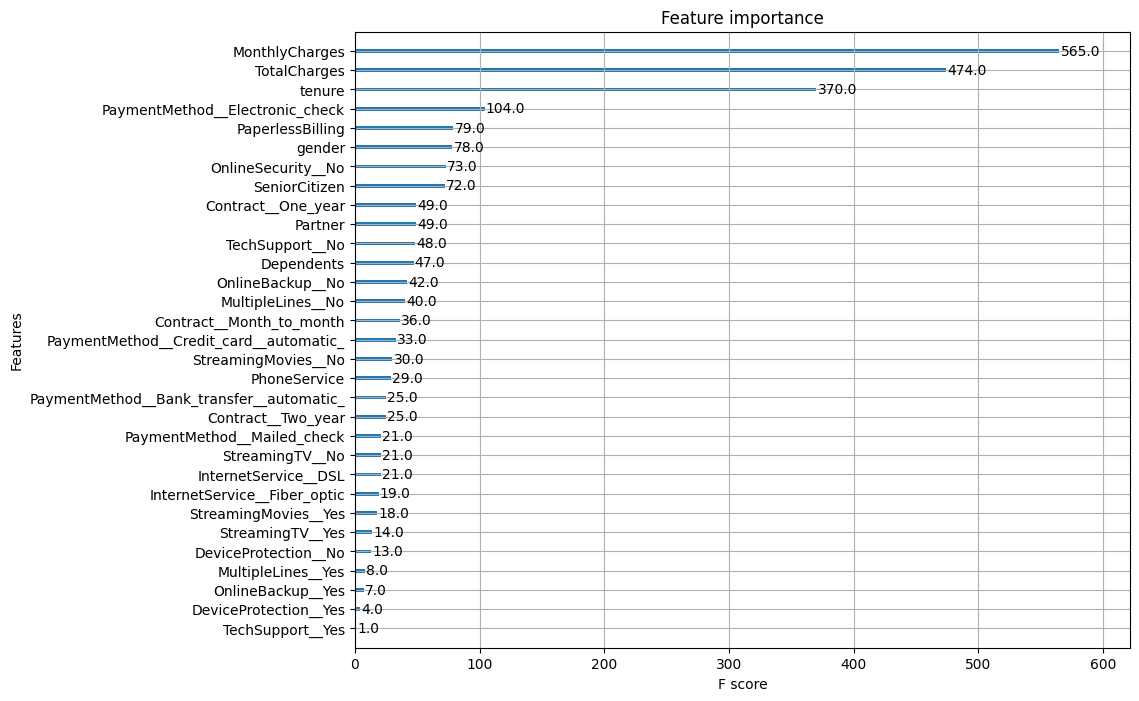

In [ ]:
# Xem xét XGBOOST đang xem các trưng nào là quan trọng nhất để huấn luyện
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)



> **MonthlyCharges**, **TotalCharges** và **Tenure** là những yếu tố quan trọng nhất ảnh hưởng tới tỉ lệ rời bỏ.

> Nhận biết các yếu tố ảnh hưởng đến tỉ lệ Churn có thể cho doanh nghiệp thấy được điểm mạnh và điểm yếu của mình trong kinh doanh.




In [ ]:
#Tính toán xác suất Churn của từng khách hàng cho các chiến lược sau này
df_data['proba'] = xgb_model.predict_proba(df_data[X_train.columns])[:,1]
df_data[['customerID','proba']].head()

,customerID,proba
0,7590-VHVEG,0.661718
1,5575-GNVDE,0.034777
2,3668-QPYBK,0.331806
3,7795-CFOCW,0.034865
4,9237-HQITU,0.590153
